# Hyperparameter optimization for SVM (with RBF kernel) algorithm

In the following we apply the SVM classifier with RBF kernel to a simple data set with failure/success categories and seek to optimize the hyperparameters of the model. These are the C and gamma parameters. We do this via defining a pipeline and mounting grid search on top of this. 

For information on SVMs, we refer to https://en.wikipedia.org/wiki/Support-vector_machine. For information on grid search in python, we refer to https://medium.com/datadriveninvestor/an-introduction-to-grid-search-ff57adcc0998. 

Notice that throughout this notebook, we initially split the data set into a training (Train) and test (Test) set. The latter will be a hold out set. The former will then be used in the grid search via cross validation for the hyperparameter optimization. To this end, it is split into a training set (Train') and a test (Test') set where the latter is now used as a validation set in fact.

We also add a discussion of the confusion matrix and AUC score to further assess the quality of our optimized model.

In [1]:
#import necessary packages
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

%matplotlib inline
import matplotlib.pyplot as plt

from helper import plot_classifier #helper.py is saved in the repository

In [2]:
#define data frame
df = pd.read_csv("classification.csv")

#to trop columns 
#df = df.drop("name of column", axis = 1)

df.head()

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0


In [10]:
#define variables with train/test splitting (the test set here is a hold out set!!!)
X = df[["age", "interest"]].values
Y = df["success"].values #single brackets (!) needed for classification machine learling processing

#this step before building the pipleline is important to have training/validation/test data splitting
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0)#, test_size = .2)

In [11]:
#automated pipeline with gridsearch
#define pipeline that combines StandardScaler with learning algorithm
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

pipeline = Pipeline([("scaler", StandardScaler()), ("svm", SVC(kernel = "rbf", probability = True))])

#allows us to adjust parameters on the level of the pipeline
from sklearn.model_selection import GridSearchCV

#notice that GridSearchCV splits the data again for the hyperparameter optimization: training data -> training and validation data
classifier = GridSearchCV(pipeline, param_grid = {"svm__gamma": [0.001, 0.01, 0.1, 1, 10], "svm__C": [0.001, 0.01, 0.1, 1, 10]})

#fit over the above-defined training data which is spli by GridSearchCV into training/ (hold out) validation data
classifier.fit(X_train, Y_train)

print("Hyperparameter setting that gave the best results on the (hold out) validation data: " + str(classifier.best_params_))

print("Test score with respect to (hold out) test set: " + str(classifier.score(X_test, Y_test)))

print("Mean cross-validated test score of the best_estimator: " + str(classifier.best_score_))

print("The number of cross-validation splits (folds/iterations): " + str(classifier.n_splits_))

/Users/Andreas/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Hyperparameter setting that gave the best results on the (hold out) validation data: {'svm__C': 1, 'svm__gamma': 0.1}
Test score with respect to (hold out) test set: 0.9333333333333333
Mean cross-validated test score of the best_estimator: 0.9009009009009009
The number of cross-validation splits (folds/iterations): 3


/Users/Andreas/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Observation: The results are obviously sensitive towards the ratio for the initial splitting into training/test sets.

In [12]:
#Estimator that was chosen by the search, i.e. estimator which gave highest score (or smallest loss if specified) on the left out data
classifier.best_estimator_

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm', SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [13]:
#A data frame summarizing the gridsearch results
gridsearchsumdf = pd.DataFrame.from_dict(classifier.cv_results_)
gridsearchsumdf

/Users/Andreas/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/Andreas/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/Andreas/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/Andreas/anaconda3/

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svm__C,param_svm__gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.005023,0.000750,0.000916,2.070905e-05,0.001,0.001,"{'svm__C': 0.001, 'svm__gamma': 0.001}",0.586667,0.594595,0.589041,0.590090,0.003329,13,0.591837,0.587838,0.590604,0.590093,0.001672
1,0.004253,0.000185,0.000851,2.695314e-05,0.001,0.01,"{'svm__C': 0.001, 'svm__gamma': 0.01}",0.586667,0.594595,0.589041,0.590090,0.003329,13,0.591837,0.587838,0.590604,0.590093,0.001672
2,0.005023,0.001299,0.000864,1.788773e-04,0.001,0.1,"{'svm__C': 0.001, 'svm__gamma': 0.1}",0.586667,0.594595,0.589041,0.590090,0.003329,13,0.591837,0.587838,0.590604,0.590093,0.001672
3,0.005772,0.001197,0.001037,3.727019e-04,0.001,1,"{'svm__C': 0.001, 'svm__gamma': 1}",0.586667,0.594595,0.589041,0.590090,0.003329,13,0.591837,0.587838,0.590604,0.590093,0.001672
4,0.005284,0.001130,0.001149,5.616703e-04,0.001,10,"{'svm__C': 0.001, 'svm__gamma': 10}",0.586667,0.594595,0.589041,0.590090,0.003329,13,0.591837,0.587838,0.590604,0.590093,0.001672
5,0.003823,0.000012,0.000705,4.304760e-06,0.01,0.001,"{'svm__C': 0.01, 'svm__gamma': 0.001}",0.586667,0.594595,0.589041,0.590090,0.003329,13,0.591837,0.587838,0.590604,0.590093,0.001672
6,0.004204,0.000547,0.000777,8.422181e-05,0.01,0.01,"{'svm__C': 0.01, 'svm__gamma': 0.01}",0.586667,0.594595,0.589041,0.590090,0.003329,13,0.591837,0.587838,0.590604,0.590093,0.001672
7,0.004216,0.000068,0.000729,2.731185e-05,0.01,0.1,"{'svm__C': 0.01, 'svm__gamma': 0.1}",0.586667,0.594595,0.589041,0.590090,0.003329,13,0.591837,0.587838,0.590604,0.590093,0.001672
8,0.004195,0.000345,0.000783,3.650548e-05,0.01,1,"{'svm__C': 0.01, 'svm__gamma': 1}",0.586667,0.594595,0.589041,0.590090,0.003329,13,0.591837,0.587838,0.590604,0.590093,0.001672
9,0.007075,0.000917,0.001135,3.437844e-04,0.01,10,"{'svm__C': 0.01, 'svm__gamma': 10}",0.586667,0.594595,0.589041,0.590090,0.003329,13,0.591837,0.587838,0.590604,0.590093,0.001672


Notice that in this table the scores for the splits are named e.g. split1_test_score and split1_train_score but are done on the original training data. So the test_score is in fact a validation score.

### Visualizing the results

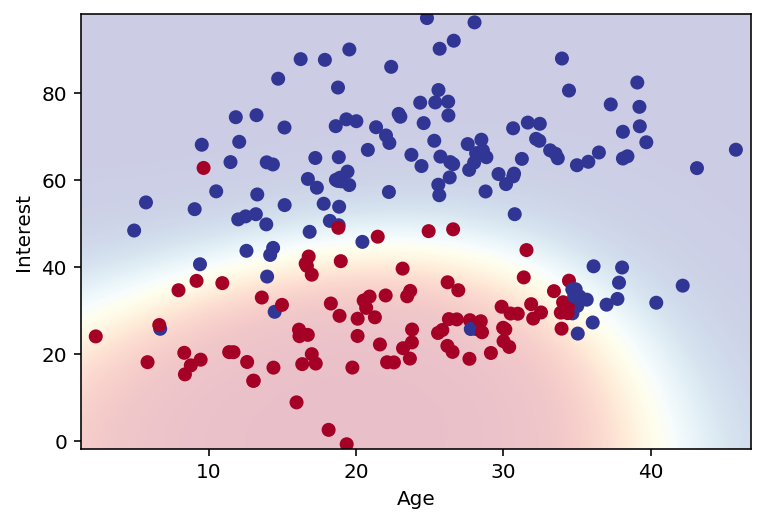

In [14]:
#visualizing the results for training and test sets
plot_classifier(classifier, X_train, Y_train, proba = True, xlabel = "Age", ylabel = "Interest")

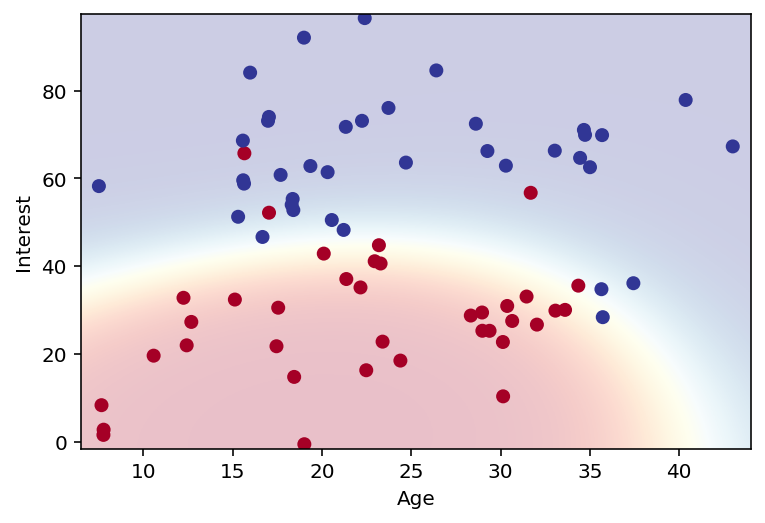

In [15]:
plot_classifier(classifier, X_test, Y_test, proba = True, xlabel = "Age", ylabel = "Interest")

### Confusion matrix and ROC curve

In the following we would like to explore two related concepts to further judge the quality of a classification model, i.e. find a way to quantify the misclassifications. This is done via the so-called confusion matrix and the ROC-curve/AUC-score which allow us to compute the true-positive and false-positive rates and compare them.

For further information regarding the confusion matrix, we refer to https://en.wikipedia.org/wiki/Confusion_matrix. 

The Receiver-operating-characteristic curve plots the true-postive rates over the false-positive rates for a respective model. The area-under-curve (AUC) is numerically obtained from the plot. The higher the value to 1 the better it is. For further information regarding these points, we refer to https://en.wikipedia.org/wiki/Receiver_operating_characteristic.

In [16]:
#introduce confusion matrix
from sklearn.metrics import confusion_matrix
Y_test_pred = classifier.predict(X_test)
confusion_matrix(Y_test, Y_test_pred)

array([[33,  4],
       [ 1, 37]])

In [17]:
#predict Y values according to respective model from test data X_test, output in terms of probabilities (as compared to model1.predict(X_test))
Y_test_pred = classifier.predict_proba(X_test)[:,1] #all lines of second column (1st and 2nd column are linearly dependent)

In [18]:
#introduce ROC curve and AUC score
from sklearn.metrics import roc_curve, roc_auc_score

In [19]:
#compute ROC curve
# false-positive rate, true-positive rate, threshold values
fpr, tpr, thresholds = roc_curve(Y_test,Y_test_pred)

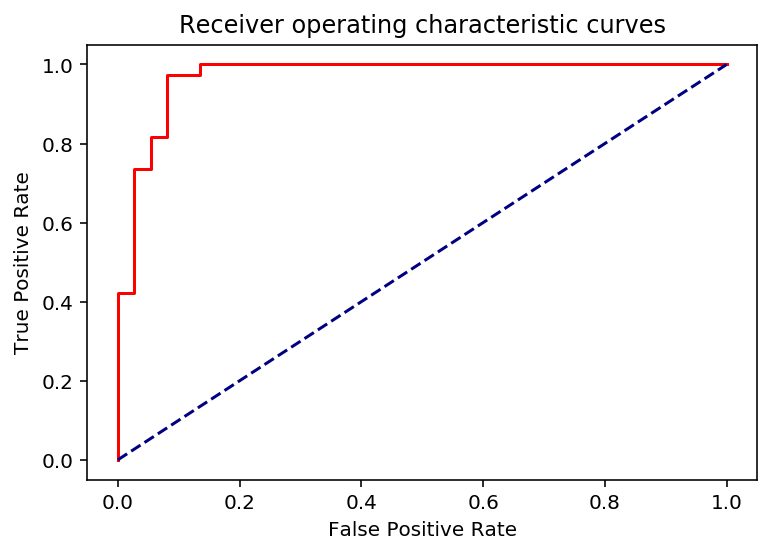

In [20]:
#plot ROC curve
#ideal curve would be step function
plt.plot(fpr, tpr, color = 'r')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curves')
plt.show()

In [21]:
print(roc_auc_score(Y_test,Y_test_pred))

0.9708392603129445


The ROC-curve can be used to distinguish the quality of models even further. As it seems, the optimized SVM model with RBF kernel fits the data pretty well, according to the 2 score types (test score and auc score).